# Plotting

In [3]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels.api as sm
from scipy import stats

In [4]:
rnaseq_df = pd.read_csv("rnaseq_depmap2024.tsv", sep="\t", index_col=0)
model_df = pd.read_csv("models_depmap2024.tsv", sep="\t", index_col=0)

In [5]:
# each row refers to a specific cell line, and gives info about the cell line
# tissue type, cancer type, name, age, sex, etc.
model_df

# question about subsetting: can catch head value as new df (code below)
# head_df = model_df.head(n=100)

,PatientID,CellLineName,StrippedCellLineName,DepmapModelType,OncotreeLineage,OncotreePrimaryDisease,OncotreeSubtype,OncotreeCode,PatientSubtypeFeatures,RRID,...,EngineeredModelDetails,CulturedResistanceDrug,PublicComments,CCLEName,HCMIID,ModelAvailableInDbgap,ModelSubtypeFeatures,WTSIMasterCellID,SangerModelID,COSMICID
ModelID,,,,,,,,,,,,,,,,,,,,,
ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,HGSOC,Ovary/Fallopian Tube,Ovarian Epithelial Tumor,High-Grade Serous Ovarian Cancer,HGSOC,NaN,CVCL_0465,...,NaN,NaN,NaN,NIHOVCAR3_OVARY,NaN,Available in SRA,NaN,2201.0,SIDM00105,905933.0
ACH-000002,PT-5qa3uk,HL-60,HL60,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,"TP53(del), CDKN2A and NRAS mutations [PubMed=2...",CVCL_0002,...,NaN,NaN,NaN,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,Available in SRA,NaN,55.0,SIDM00829,905938.0
ACH-000003,PT-puKIyc,CACO2,CACO2,COAD,Bowel,Colorectal Adenocarcinoma,Colon Adenocarcinoma,COAD,NaN,CVCL_0025,...,NaN,NaN,NaN,CACO2_LARGE_INTESTINE,NaN,Available in SRA,NaN,NaN,SIDM00891,NaN
ACH-000004,PT-q4K2cp,HEL,HEL,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,"JAK2 and TP53 mutations,",CVCL_0001,...,NaN,NaN,NaN,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,Available in SRA,NaN,783.0,SIDM00594,907053.0
ACH-000005,PT-q4K2cp,HEL 92.1.7,HEL9217,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,JAK2 and TP53 mutations,CVCL_2481,...,NaN,NaN,NaN,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,Available in SRA,NaN,NaN,SIDM00593,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-003473,PT-fG5tCh,CCLF_PEDS_0013_T,CCLFPEDS0013T,ERMS,Soft Tissue,Rhabdomyosarcoma,Embryonal Rhabdomyosarcoma,ERMS,NaN,NaN,...,NaN,NaN,NaN,NaN,HCM-BROD-0006-C49,NaN,NaN,NaN,NaN,NaN
ACH-003474,PT-WxfjG3,CCLF_HNSC_0001_T,CCLFHNSC0001T,HNSC,Head and Neck,Head and Neck Squamous Cell Carcinoma,Head and Neck Squamous Cell Carcinoma,HNSC,NaN,NaN,...,NaN,NaN,NaN,NaN,HCM-BROD-1131-C06,NaN,NaN,NaN,NaN,NaN
ACH-003475,PT-ce6oqw,CCLF_HNSC_0003_T,CCLFHNSC0003T,HNSC,Head and Neck,Head and Neck Squamous Cell Carcinoma,Head and Neck Squamous Cell Carcinoma,HNSC,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# log transformed TPMs for genes (Hugo and entrez IDs)
rnaseq_df

,TFE3 (7030),MMADHC (27249),PABPC1L (80336),RELL2 (285613),GPT (2875),GUSB (2990),H4-16 (121504),DDB2 (1643),RPS4X (6191),HINFP (25988),...,OR2A42 (402317),HOXB7 (3217),NSA2 (10412),UGT2B11 (10720),ZNF747 (65988),NAA60 (79903),MYH4 (4622),MTAP (4507),C14orf93 (60686),NR3C2 (4306)
ACH-000873,3.607691,3.531071,4.982285,2.326016,0.607679,5.118549,1.282028,4.512297,10.075438,2.954654,...,0.042564,3.870581,5.178480,-0.007723,2.005498,4.213717,-0.001724,3.904800,2.190931,0.203910
ACH-000860,4.192566,6.865682,4.853288,2.725583,0.197016,5.666426,1.154470,4.306808,10.215240,4.096901,...,0.031621,-0.005897,6.749713,-0.007723,1.393644,4.334535,-0.001724,4.812949,3.366939,0.370726
ACH-000439,3.265517,5.804615,1.777636,4.185835,0.389025,6.593342,0.410244,4.411381,11.644890,4.744030,...,-0.013226,-0.033868,6.877322,1.596383,3.143557,4.624226,-0.001724,4.122929,2.197136,0.015412
ACH-000318,3.705500,5.813170,4.536005,2.290409,0.471169,5.160089,2.325673,5.017968,9.163992,2.578735,...,-0.013226,3.051092,5.610027,-0.007723,2.334419,3.881219,-0.001724,0.394778,3.217293,0.277760
ACH-001142,6.105227,7.051513,4.457555,2.543055,0.022363,4.589966,2.369987,4.105131,10.179188,3.795200,...,0.053402,3.582671,7.416571,-0.007723,2.294077,4.889203,-0.001724,4.379944,2.355443,0.520338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-001843,5.343844,6.553367,5.674036,3.390159,0.644076,5.555928,1.037326,4.275462,11.191982,3.898700,...,0.026960,5.222260,7.411799,0.010848,0.563822,4.885868,0.000741,4.898450,2.716015,0.067286
ACH-002074,5.252185,6.258400,2.872415,1.886574,0.796319,6.534374,3.269016,4.587816,9.946776,4.086724,...,0.104563,4.270369,6.188434,0.010848,3.447185,5.964889,0.000741,4.181277,3.931034,0.695929
ACH-001164,4.050893,6.248805,2.790849,1.599247,0.663686,5.533158,0.646986,5.091849,10.865960,3.390254,...,0.026960,0.470043,6.898124,1.385374,2.641063,4.824132,0.022977,3.384695,2.413815,0.221968
ACH-003180,5.161680,7.678250,1.932748,1.463134,0.394206,6.464239,0.360318,4.761168,9.531740,3.015668,...,0.104563,4.741295,6.250017,0.010848,2.652496,5.139537,0.044994,4.773658,2.686730,0.011768


In [7]:
# we can just keep one of the gene names rather than having both in the columns
# we're going to rename columns

rnaseq_df.columns #returns an array of colnames

Index(['TFE3 (7030)', 'MMADHC (27249)', 'PABPC1L (80336)', 'RELL2 (285613)',
       'GPT (2875)', 'GUSB (2990)', 'H4-16 (121504)', 'DDB2 (1643)',
       'RPS4X (6191)', 'HINFP (25988)',
       ...
       'OR2A42 (402317)', 'HOXB7 (3217)', 'NSA2 (10412)', 'UGT2B11 (10720)',
       'ZNF747 (65988)', 'NAA60 (79903)', 'MYH4 (4622)', 'MTAP (4507)',
       'C14orf93 (60686)', 'NR3C2 (4306)'],
      dtype='object', length=19138)

In [8]:
# using string split

s = "the quick brown fox jumped over the lazy dog"

In [9]:
s.split(" ")

['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']

In [10]:
# use map like apply -- do lambda to split strings and keep only the first output
# map is used for Series (a column is like a series), while apply is used for entire rows or columns of a df
# map is a one to one transfer of individual elements (like for logtransform)
# rename columns using string split to only keep Hugo names

rnaseq_df.columns = rnaseq_df.columns.map(lambda x: x.split(" ")[0]) #can apply a function to this

In [11]:
rnaseq_df

,TFE3,MMADHC,PABPC1L,RELL2,GPT,GUSB,H4-16,DDB2,RPS4X,HINFP,...,OR2A42,HOXB7,NSA2,UGT2B11,ZNF747,NAA60,MYH4,MTAP,C14orf93,NR3C2
ACH-000873,3.607691,3.531071,4.982285,2.326016,0.607679,5.118549,1.282028,4.512297,10.075438,2.954654,...,0.042564,3.870581,5.178480,-0.007723,2.005498,4.213717,-0.001724,3.904800,2.190931,0.203910
ACH-000860,4.192566,6.865682,4.853288,2.725583,0.197016,5.666426,1.154470,4.306808,10.215240,4.096901,...,0.031621,-0.005897,6.749713,-0.007723,1.393644,4.334535,-0.001724,4.812949,3.366939,0.370726
ACH-000439,3.265517,5.804615,1.777636,4.185835,0.389025,6.593342,0.410244,4.411381,11.644890,4.744030,...,-0.013226,-0.033868,6.877322,1.596383,3.143557,4.624226,-0.001724,4.122929,2.197136,0.015412
ACH-000318,3.705500,5.813170,4.536005,2.290409,0.471169,5.160089,2.325673,5.017968,9.163992,2.578735,...,-0.013226,3.051092,5.610027,-0.007723,2.334419,3.881219,-0.001724,0.394778,3.217293,0.277760
ACH-001142,6.105227,7.051513,4.457555,2.543055,0.022363,4.589966,2.369987,4.105131,10.179188,3.795200,...,0.053402,3.582671,7.416571,-0.007723,2.294077,4.889203,-0.001724,4.379944,2.355443,0.520338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-001843,5.343844,6.553367,5.674036,3.390159,0.644076,5.555928,1.037326,4.275462,11.191982,3.898700,...,0.026960,5.222260,7.411799,0.010848,0.563822,4.885868,0.000741,4.898450,2.716015,0.067286
ACH-002074,5.252185,6.258400,2.872415,1.886574,0.796319,6.534374,3.269016,4.587816,9.946776,4.086724,...,0.104563,4.270369,6.188434,0.010848,3.447185,5.964889,0.000741,4.181277,3.931034,0.695929
ACH-001164,4.050893,6.248805,2.790849,1.599247,0.663686,5.533158,0.646986,5.091849,10.865960,3.390254,...,0.026960,0.470043,6.898124,1.385374,2.641063,4.824132,0.022977,3.384695,2.413815,0.221968
ACH-003180,5.161680,7.678250,1.932748,1.463134,0.394206,6.464239,0.360318,4.761168,9.531740,3.015668,...,0.104563,4.741295,6.250017,0.010848,2.652496,5.139537,0.044994,4.773658,2.686730,0.011768


In [12]:
# Before we join, we will restrict to the most variable of genes

rnaseq_df.var()

TFE3        0.745742
MMADHC      0.344679
PABPC1L     1.462463
RELL2       0.973144
GPT         0.415639
              ...   
NAA60       0.354831
MYH4        0.025304
MTAP        3.230695
C14orf93    0.386222
NR3C2       0.541670
Length: 19138, dtype: float64

In [13]:
# we want the top 1000 most variable genes
variable_genes = rnaseq_df.var().sort_values(ascending=False)[:1000].index #.index will keep only the genes (index)

In [14]:
variable_genes

Index(['SPARC', 'KRT19', 'FN1', 'C19orf33', 'TGFBI', 'RPS4Y1', 'UCHL1', 'VIM',
       'KRT7', 'KRT8',
       ...
       'NCF4', 'NXN', 'STAP2', 'PROS1', 'APOBEC3G', 'ACP5', 'GAS7', 'KLF4',
       'CDKN1A', 'P4HA2'],
      dtype='object', length=1000)

In [15]:
# we want to keep only the most variable genes, so we are subsetting by keeping all the rows[:]
# but only specifying the index of the variable genes (as above, top 1000 most variable genes)
rnaseq_df = rnaseq_df.loc[:,variable_genes]

In [16]:
rnaseq_df

,SPARC,KRT19,FN1,C19orf33,TGFBI,RPS4Y1,UCHL1,VIM,KRT7,KRT8,...,NCF4,NXN,STAP2,PROS1,APOBEC3G,ACP5,GAS7,KLF4,CDKN1A,P4HA2
ACH-000873,0.837729,8.975399,5.021780,6.294583,7.362137,7.352594,8.506367,4.016311,2.990821,8.599381,...,-0.013462,4.942177,3.470370,2.132970,0.217277,0.313823,1.139417,3.445992,4.369613,5.837542
ACH-000860,1.306335,9.315365,7.111923,8.057272,9.815371,8.139684,5.667177,7.073591,9.751536,9.769989,...,-0.013462,2.021363,4.308319,2.727327,0.269239,3.407135,0.143366,4.385773,3.604127,5.045666
ACH-000439,8.815292,-0.196002,0.954418,-0.171422,0.461725,8.697629,0.405518,8.750925,0.703107,2.660447,...,6.342906,0.064426,2.880118,0.110890,4.045792,0.288666,1.717993,-0.177017,2.472430,0.453488
ACH-000318,3.271206,9.572499,7.845696,9.562125,8.630944,1.597513,4.370711,7.372734,6.376955,10.091135,...,0.093467,3.874254,4.711089,0.421650,2.215249,2.807343,0.860769,4.075018,5.493807,4.342597
ACH-001142,11.253107,6.045606,13.988426,4.056279,10.275837,8.558051,9.252441,12.612595,7.129454,4.124124,...,-0.041506,5.843684,1.820543,3.470728,3.103390,-0.048574,0.014334,3.220961,4.316639,5.754015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-001843,7.593528,1.322335,10.404217,0.806968,9.117007,0.270069,0.537329,12.531562,1.377653,5.822044,...,0.292536,5.051686,1.144116,4.896240,3.132840,4.070016,-0.009493,1.886259,7.731751,5.129553
ACH-002074,1.745961,7.813189,7.280556,1.837481,1.697652,8.329645,9.663483,2.897507,4.309542,9.381448,...,0.059471,3.138975,2.048799,0.182742,2.148075,0.488892,0.192384,3.220644,5.153898,3.812999
ACH-001164,9.331850,2.066002,9.484334,1.524871,6.135380,9.360992,5.257316,10.204294,1.707291,5.582136,...,1.897784,4.515085,3.891821,2.975524,2.025273,2.045299,1.299107,1.666447,6.190464,4.248093
ACH-003180,9.977009,1.309323,10.523127,0.806968,5.385650,0.270069,9.510003,10.014274,4.786670,4.171443,...,0.059471,6.042834,3.336063,4.677342,0.232506,1.451024,0.204068,4.704354,7.740433,6.244124


In [17]:
# the index of the model data (model IDs) is an index in the RNAseq dataframe
# we will join the metadata to the RNAseq data (top 1000 most variable genes)
# for this, we only want the lineage (tissue type) as metadata, don't need all of it
# here's how we do that:

joint_df = rnaseq_df.join(model_df[["OncotreeLineage", "Sex", "Age"]], how="left") #left to keep all the rnaseq data


In [18]:
joint_df

,SPARC,KRT19,FN1,C19orf33,TGFBI,RPS4Y1,UCHL1,VIM,KRT7,KRT8,...,PROS1,APOBEC3G,ACP5,GAS7,KLF4,CDKN1A,P4HA2,OncotreeLineage,Sex,Age
ACH-000873,0.837729,8.975399,5.021780,6.294583,7.362137,7.352594,8.506367,4.016311,2.990821,8.599381,...,2.132970,0.217277,0.313823,1.139417,3.445992,4.369613,5.837542,Esophagus/Stomach,Male,79.0
ACH-000860,1.306335,9.315365,7.111923,8.057272,9.815371,8.139684,5.667177,7.073591,9.751536,9.769989,...,2.727327,0.269239,3.407135,0.143366,4.385773,3.604127,5.045666,Lung,Male,NaN
ACH-000439,8.815292,-0.196002,0.954418,-0.171422,0.461725,8.697629,0.405518,8.750925,0.703107,2.660447,...,0.110890,4.045792,0.288666,1.717993,-0.177017,2.472430,0.453488,Myeloid,Male,40.0
ACH-000318,3.271206,9.572499,7.845696,9.562125,8.630944,1.597513,4.370711,7.372734,6.376955,10.091135,...,0.421650,2.215249,2.807343,0.860769,4.075018,5.493807,4.342597,Esophagus/Stomach,Male,58.0
ACH-001142,11.253107,6.045606,13.988426,4.056279,10.275837,8.558051,9.252441,12.612595,7.129454,4.124124,...,3.470728,3.103390,-0.048574,0.014334,3.220961,4.316639,5.754015,CNS/Brain,Male,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-001843,7.593528,1.322335,10.404217,0.806968,9.117007,0.270069,0.537329,12.531562,1.377653,5.822044,...,4.896240,3.132840,4.070016,-0.009493,1.886259,7.731751,5.129553,Biliary Tract,Unknown,NaN
ACH-002074,1.745961,7.813189,7.280556,1.837481,1.697652,8.329645,9.663483,2.897507,4.309542,9.381448,...,0.182742,2.148075,0.488892,0.192384,3.220644,5.153898,3.812999,Lung,Male,60.0
ACH-001164,9.331850,2.066002,9.484334,1.524871,6.135380,9.360992,5.257316,10.204294,1.707291,5.582136,...,2.975524,2.025273,2.045299,1.299107,1.666447,6.190464,4.248093,Soft Tissue,Male,NaN
ACH-003180,9.977009,1.309323,10.523127,0.806968,5.385650,0.270069,9.510003,10.014274,4.786670,4.171443,...,4.677342,0.232506,1.451024,0.204068,4.704354,7.740433,6.244124,Soft Tissue,Female,56.0


Question about merge vs. join:

Merge is a more flexible version of join. Merge allows you to use arbitrary columns of each table to perform the operation. We can use join for above because both indexes are compatible between dfs

In [19]:
# Question: move the column to the left most side to make it easier to read
# this wasn't captured, but this is a nice thing to know how to do it. See code below
# joint_df[["OncotreeLineage"] + list(variable_genes)]

# could also do an equivelant join but with the desired column in front, see code below
# model_df[["OncotreeLineage"]].join(rnaseq_df, how="right") #left to keep all the rnaseq data

In [20]:
# PCA, using statsmodels for this

pca_all = sm.PCA(joint_df[variable_genes])

In [21]:
# for visualization, only need 2 PCs
# so we specify that with ncomp here (number of principle components)
pca = sm.PCA(joint_df[variable_genes], ncomp=2)

In [22]:
# look at output of this (see PC1 and PC2 values for each sample)
pca.factors

,comp_0,comp_1
ACH-000873,0.009651,-0.009481
ACH-000860,0.010914,-0.022688
ACH-000439,-0.048171,0.009323
ACH-000318,0.012218,-0.025505
ACH-001142,0.028165,0.035736
...,...,...
ACH-001843,0.006864,0.016476
ACH-002074,-0.011238,-0.005864
ACH-001164,-0.000960,0.021436
ACH-003180,0.022679,0.035854


In [23]:
# save pca factors to dataframe
pca_df = pca.factors

In [24]:
# add metadata to this
pca_df = pca_df.join(model_df[["OncotreeLineage"]],how="left")

In [25]:
pca_df

,comp_0,comp_1,OncotreeLineage
ACH-000873,0.009651,-0.009481,Esophagus/Stomach
ACH-000860,0.010914,-0.022688,Lung
ACH-000439,-0.048171,0.009323,Myeloid
ACH-000318,0.012218,-0.025505,Esophagus/Stomach
ACH-001142,0.028165,0.035736,CNS/Brain
...,...,...,...
ACH-001843,0.006864,0.016476,Biliary Tract
ACH-002074,-0.011238,-0.005864,Lung
ACH-001164,-0.000960,0.021436,Soft Tissue
ACH-003180,0.022679,0.035854,Soft Tissue


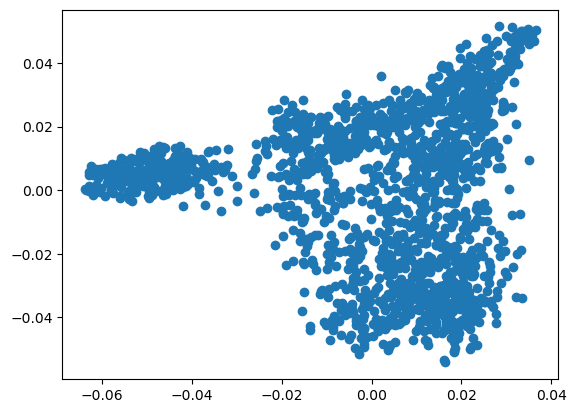

In [26]:
# visualize
plt.scatter(pca_df["comp_0"], pca_df["comp_1"])

In [27]:
plt.scatter?

Signature:
plt.scatter(
    x: 'float | ArrayLike',
    y: 'float | ArrayLike',
    s: 'float | ArrayLike | None' = None,
    c: 'ArrayLike | Sequence[ColorType] | ColorType | None' = None,
    *,
    marker: 'MarkerType | None' = None,
    cmap: 'str | Colormap | None' = None,
    norm: 'str | Normalize | None' = None,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    alpha: 'float | None' = None,
    linewidths: 'float | Sequence[float] | None' = None,
    edgecolors: "Literal['face', 'none'] | ColorType | Sequence[ColorType] | None" = None,
    colorizer: 'Colorizer | None' = None,
    plotnonfinite: 'bool' = False,
    data=None,
    **kwargs,
) -> 'PathCollection'
Docstring:
A scatter plot of *y* vs. *x* with varying marker size and/or color.

Parameters
----------
x, y : float or array-like, shape (n, )
    The data positions.

s : float or array-like, shape (n, ), optional
    The marker size in points**2 (typographic points are 1/72 in.).
    Default is ``rc

In [28]:
# we're gonna make it prettier
# color by lineage
# first we need to know what lineages there are (33)

pca_df["OncotreeLineage"].nunique()

33

In [29]:
# we can give an integer and matplotlib will automatically choose a color for each integer
# so we need to make a list of integers
# we'll use a dictionary comprehension

color_map = {lineage: i for i, lineage in enumerate(pca_df["OncotreeLineage"].unique())}


In [30]:
color_map

{'Esophagus/Stomach': 0,
 'Lung': 1,
 'Myeloid': 2,
 'CNS/Brain': 3,
 'Fibroblast': 4,
 'Uterus': 5,
 'Peripheral Nervous System': 6,
 'Bone': 7,
 'Kidney': 8,
 'Lymphoid': 9,
 'Bladder/Urinary Tract': 10,
 'Liver': 11,
 'Ovary/Fallopian Tube': 12,
 'Bowel': 13,
 'Skin': 14,
 'Pancreas': 15,
 'Breast': 16,
 'Ampulla of Vater': 17,
 'Head and Neck': 18,
 'Prostate': 19,
 'Thyroid': 20,
 'Pleura': 21,
 'Biliary Tract': 22,
 'Soft Tissue': 23,
 'Cervix': 24,
 'Embryonal': 25,
 'Eye': 26,
 nan: 27,
 'Vulva/Vagina': 28,
 'Other': 29,
 'Muscle': 30,
 'Testis': 31,
 'Adrenal Gland': 32,
 'Hair': 33}

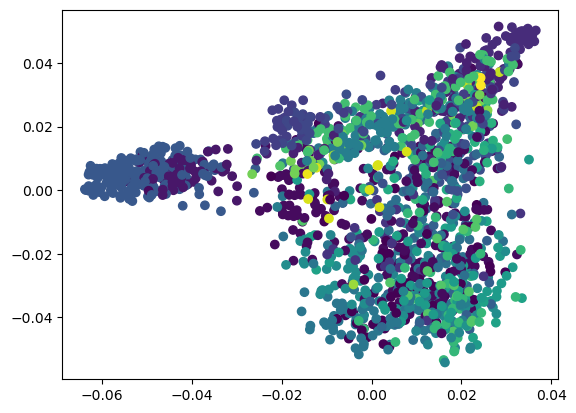

In [32]:
plt.scatter(pca_df["comp_0"], pca_df["comp_1"],
            c=pca_df["OncotreeLineage"].map(color_map)) #can provide list of colors that are the same length as x and y

In [33]:
# focus on brain only, then look at scatter plot

brain_pca_df = pca_df.loc[pca_df["OncotreeLineage"] == "CNS/Brain", :]
nonbrain_pca_df = pca_df.loc[pca_df["OncotreeLineage"] != "CNS/Brain", :]


In [34]:
# set the fonts for everything in your plots

plt.rcParams["font.family"] = "Arial" # could do "serif"
# plt.rcParams["font.serif"] = "Times New Roman"

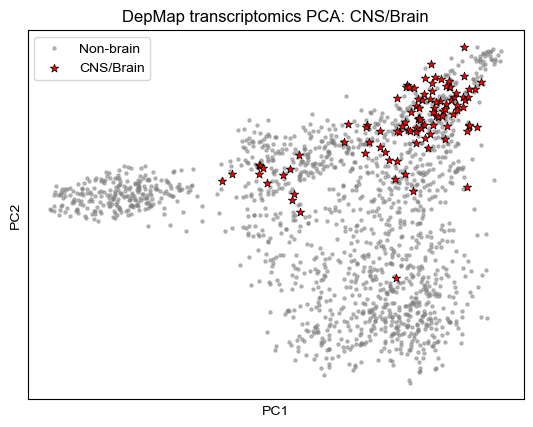

In [35]:
#if you run pyplot in the same chunk it will all affect the single plot outcome (this is the default)
plt.scatter(nonbrain_pca_df["comp_0"], nonbrain_pca_df["comp_1"], color="gray", label="Non-brain", s=5, alpha=0.5) #the label we give is what shows up in the legend, can shange size (s), change opacity with alpha
plt.scatter(brain_pca_df["comp_0"], brain_pca_df["comp_1"], color = "red", label = "CNS/Brain", marker="*", s=40, linewidths=0.5, edgecolors="black") # you have to provide labels if you want it in the legend, can change marker to shapes (.,*,x,o), linewidths is with edgecolors
plt.title("DepMap transcriptomics PCA: CNS/Brain")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xticks([]) #xticks -- we can remove these for this plot by giving an empty list (could also customize ticks with list)
plt.yticks([]) #yticks -- we can remove these for this plot. Can do rotation with rotation = "vertical" or 45
plt.legend()

## Matplotlib Subplots

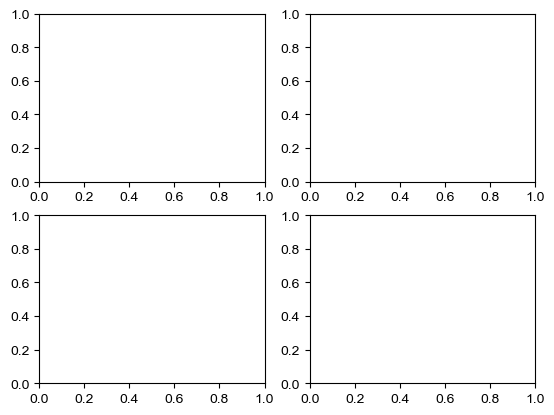

In [36]:
# when you visualize in matplotlib, it puts your data in a figure object.
# If you have multiple panels, matplotlib has a figure object with multiple axes
# you can set this up with subplots, making a grid out of number of rows and columns
fig, axs = plt.subplots(2,2)

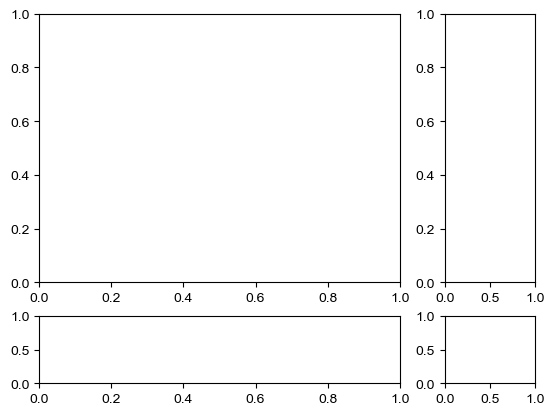

In [37]:
# we can tweak these parameters (change sizes, etc)
# the fig is the whole space
fig, axs = plt.subplots(2,2, width_ratios=[0.8, 0.2], #specify width ratios, so left takes up 80%, right takes up 20%
                        height_ratios=[0.8,0.2])

In [38]:
# the axs object is an array that matches the above figur
axs

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

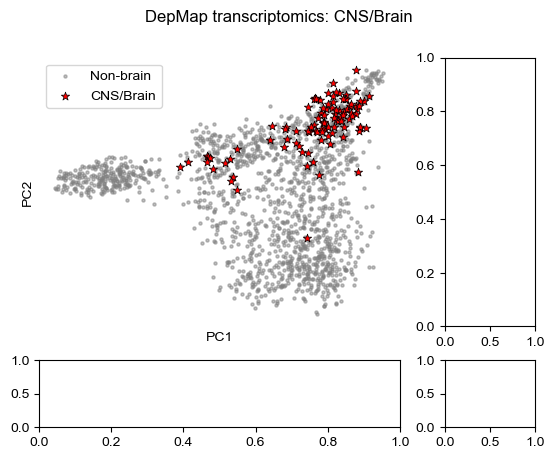

In [39]:
# let's plot our pcs in the top axs
# can make a 1 by 1 subplot, which gives you more manipulation like removing the frame (spine)
fig, axs = plt.subplots(2,2, width_ratios=[0.8, 0.2],
                        height_ratios=[0.8,0.2])
fig.suptitle("DepMap transcriptomics: CNS/Brain")
pca_ax = axs[0,0]
pca_ax.scatter(nonbrain_pca_df["comp_0"], nonbrain_pca_df["comp_1"], color="gray", label="Non-brain", s=5, alpha=0.5)
pca_ax.scatter(brain_pca_df["comp_0"], brain_pca_df["comp_1"], color = "red", label = "CNS/Brain", marker="*", s=40, linewidths=0.5, edgecolors="black")
#pca_ax.set_title("DepMap transcriptomics PCA: CNS/Brain")
pca_ax.set_xlabel("PC1")
pca_ax.set_ylabel("PC2")
pca_ax.set_xticks([])
pca_ax.set_yticks([])
pca_ax.spines["top"].set_visible(False) #removes the frame from each side of this graph
pca_ax.spines["bottom"].set_visible(False)
pca_ax.spines["left"].set_visible(False)
pca_ax.spines["right"].set_visible(False)
pca_ax.legend()

# Seaborn Plotting

In [40]:
joint_df

,SPARC,KRT19,FN1,C19orf33,TGFBI,RPS4Y1,UCHL1,VIM,KRT7,KRT8,...,PROS1,APOBEC3G,ACP5,GAS7,KLF4,CDKN1A,P4HA2,OncotreeLineage,Sex,Age
ACH-000873,0.837729,8.975399,5.021780,6.294583,7.362137,7.352594,8.506367,4.016311,2.990821,8.599381,...,2.132970,0.217277,0.313823,1.139417,3.445992,4.369613,5.837542,Esophagus/Stomach,Male,79.0
ACH-000860,1.306335,9.315365,7.111923,8.057272,9.815371,8.139684,5.667177,7.073591,9.751536,9.769989,...,2.727327,0.269239,3.407135,0.143366,4.385773,3.604127,5.045666,Lung,Male,NaN
ACH-000439,8.815292,-0.196002,0.954418,-0.171422,0.461725,8.697629,0.405518,8.750925,0.703107,2.660447,...,0.110890,4.045792,0.288666,1.717993,-0.177017,2.472430,0.453488,Myeloid,Male,40.0
ACH-000318,3.271206,9.572499,7.845696,9.562125,8.630944,1.597513,4.370711,7.372734,6.376955,10.091135,...,0.421650,2.215249,2.807343,0.860769,4.075018,5.493807,4.342597,Esophagus/Stomach,Male,58.0
ACH-001142,11.253107,6.045606,13.988426,4.056279,10.275837,8.558051,9.252441,12.612595,7.129454,4.124124,...,3.470728,3.103390,-0.048574,0.014334,3.220961,4.316639,5.754015,CNS/Brain,Male,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-001843,7.593528,1.322335,10.404217,0.806968,9.117007,0.270069,0.537329,12.531562,1.377653,5.822044,...,4.896240,3.132840,4.070016,-0.009493,1.886259,7.731751,5.129553,Biliary Tract,Unknown,NaN
ACH-002074,1.745961,7.813189,7.280556,1.837481,1.697652,8.329645,9.663483,2.897507,4.309542,9.381448,...,0.182742,2.148075,0.488892,0.192384,3.220644,5.153898,3.812999,Lung,Male,60.0
ACH-001164,9.331850,2.066002,9.484334,1.524871,6.135380,9.360992,5.257316,10.204294,1.707291,5.582136,...,2.975524,2.025273,2.045299,1.299107,1.666447,6.190464,4.248093,Soft Tissue,Male,NaN
ACH-003180,9.977009,1.309323,10.523127,0.806968,5.385650,0.270069,9.510003,10.014274,4.786670,4.171443,...,4.677342,0.232506,1.451024,0.204068,4.704354,7.740433,6.244124,Soft Tissue,Female,56.0


<Axes: xlabel='OncotreeLineage', ylabel='CDKN2A'>

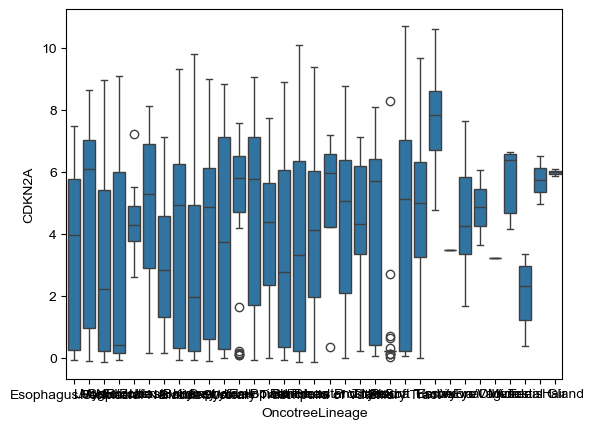

In [41]:
# try to summarize the transcriptomics for each lineage
# we can make a boxplot that shows the expression of a given gene for each lineage
# we'll choose CDKN2A

sns.boxplot(joint_df, x="OncotreeLineage", y="CDKN2A")

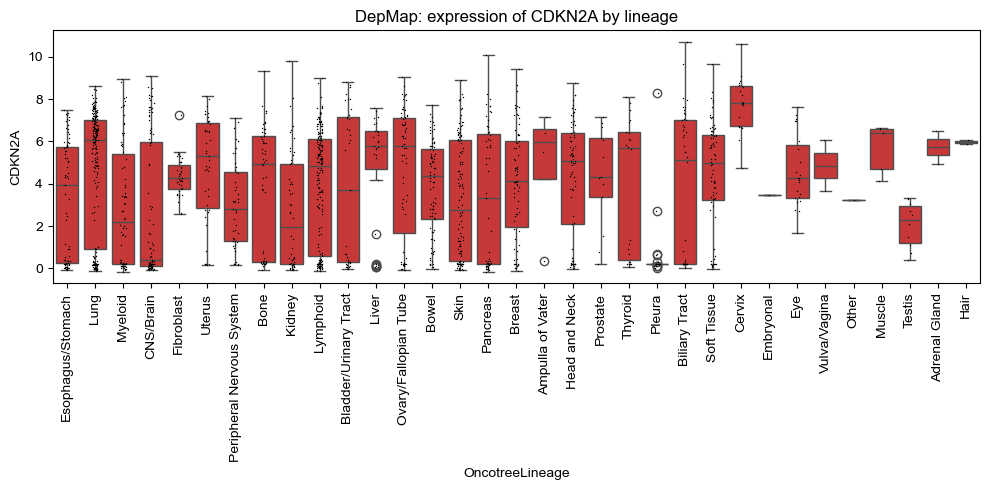

In [42]:
# Let's clean this up
plt.figure(figsize = (10, 5)) # make it wider, looks better
sns.boxplot(joint_df, x="OncotreeLineage", y="CDKN2A", color = "#DF2020") #could do color = "gray", etc.
sns.stripplot(joint_df, x="OncotreeLineage", y="CDKN2A", color = "black", size = 1.0)
plt.xticks(rotation="vertical")
plt.title("DepMap: expression of CDKN2A by lineage")
plt.tight_layout() # useful for saving figure as file
plt.savefig("CDKN2A_expression.pdf") # save it as a pdf in the bootcamp folder 

In [43]:
# search for specific gene in dataset
# this is a list comprehension: for each column, if CDK appears in that column name, then keep it
[g for g in joint_df.columns if "CDK" in g]

['CDKN2A', 'CDKN1A']

Text(0.5, 1.0, 'DepMap: expression of CDKN2A by lineage')

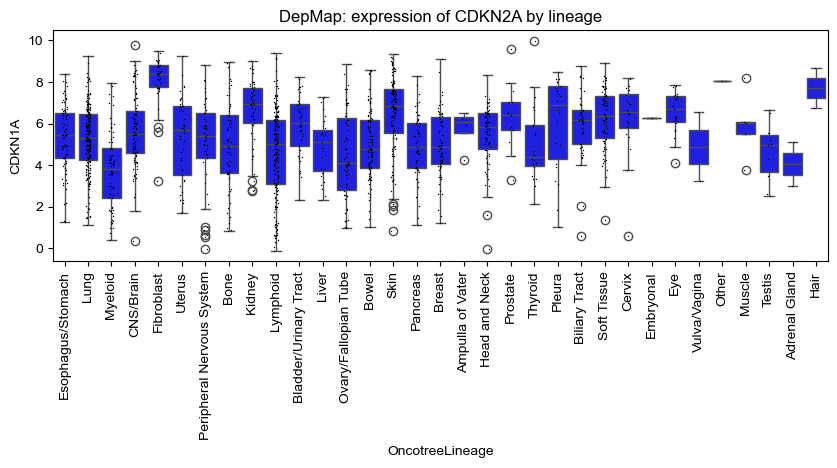

In [44]:
# CDKN1A
plt.figure(figsize = (10, 3)) # make it wider, looks better
sns.boxplot(joint_df, x="OncotreeLineage", y="CDKN1A", color = "blue") #could do color = "gray", etc.
sns.stripplot(joint_df, x="OncotreeLineage", y="CDKN1A", color = "black", size = 1.0)
plt.xticks(rotation="vertical")
plt.title("DepMap: expression of CDKN2A by lineage")

In [45]:
#define a function for this boxplot so you can plot with gene of choice easily
def gene_expression_boxplot(df,gene):
    plt.figure(figsize=(10,3))
    sns.boxplot(joint_df, x="OncotreeLineage", y=gene, color = "green") #could do color = "gray", etc.
    sns.stripplot(joint_df, x="OncotreeLineage", y=gene, color = "black", size = 1.0)
    plt.xticks(rotation="vertical")
    plt.title(f"DepMap: expression of {gene} by lineage")
    plt.tight_layout() 
    #plt.savefig(output_file) # save it as a pdf in the bootcamp folder 

sns.FacetGrid

seaborn.axisgrid.FacetGrid

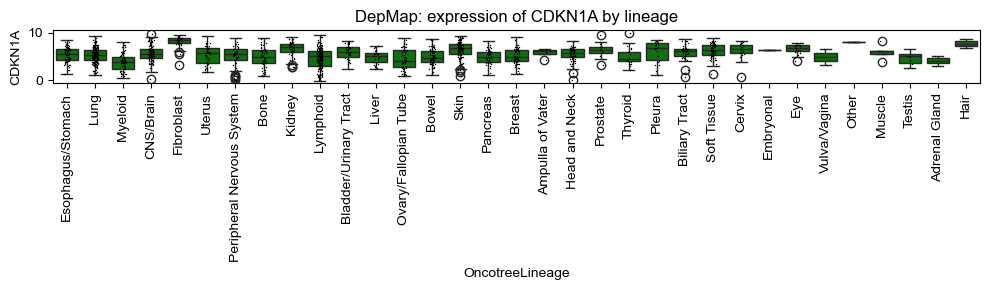

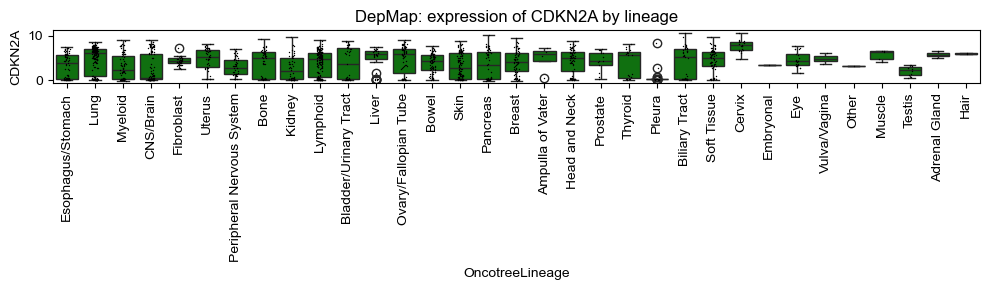

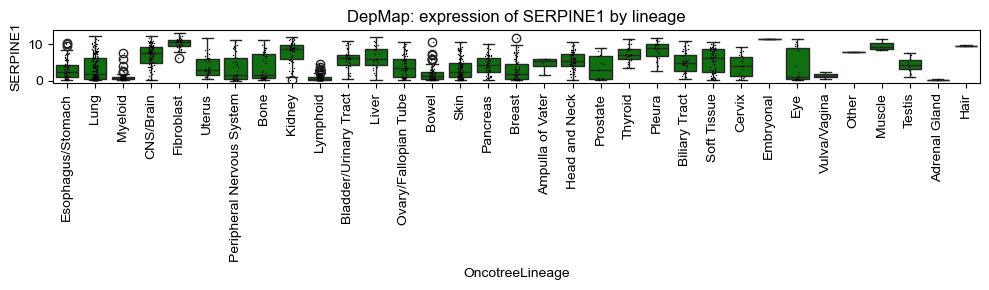

In [46]:
# make a list of genes to make boxplots of using the function above
for gene in ["CDKN1A", "CDKN2A", "SERPINE1"]:
        gene_expression_boxplot(joint_df, gene) #if save is in function, include the following: f"{gene}_expression.pdf after (joint_df, gene, 

/var/folders/rk/s463hwp930v1g8k4cz9fsfj80000gn/T/ipykernel_12185/2736157080.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#DF2020'` for the same effect.

  sns.boxplot(joint_df, x="OncotreeLineage", y="CDKN2A", color = "#DF2020", hue="Sex")


Text(0.5, 1.0, 'DepMap: expression of CDKN2A by lineage')

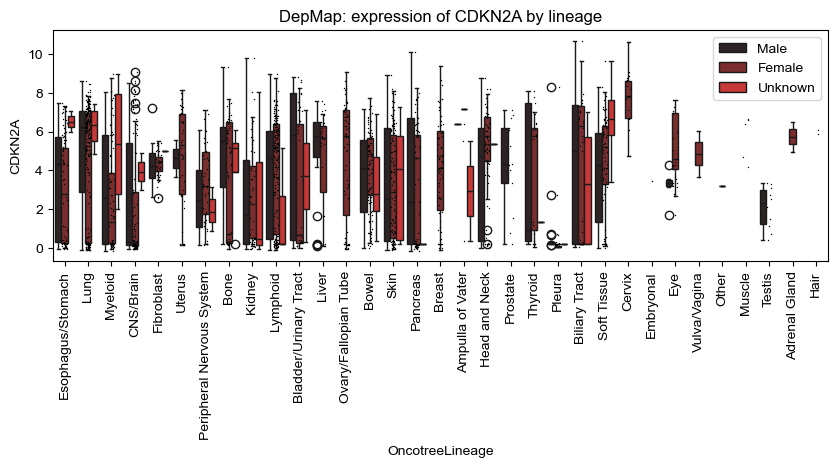

In [47]:
# change code to include hue that defines the variable sex
plt.figure(figsize = (10, 3)) # make it wider, looks better
sns.boxplot(joint_df, x="OncotreeLineage", y="CDKN2A", color = "#DF2020", hue="Sex")
sns.stripplot(joint_df, x="OncotreeLineage", y="CDKN2A", color = "black", size = 1.0)
plt.xticks(rotation="vertical")
plt.title("DepMap: expression of CDKN2A by lineage")

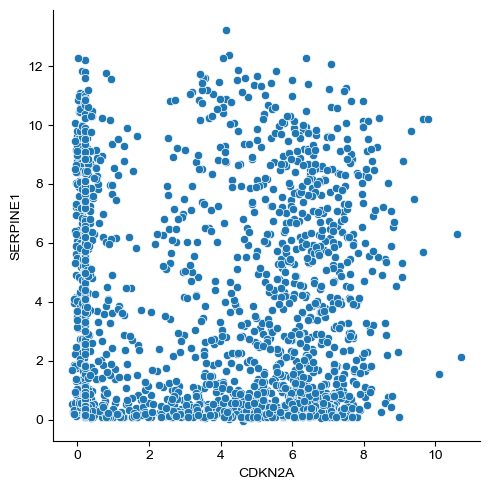

In [48]:
# seaborn makes it easy to compare the relationship between 2 variables
# we're going to pick 2 genes to compare
sns.relplot(joint_df, x= "CDKN2A", y="SERPINE1")

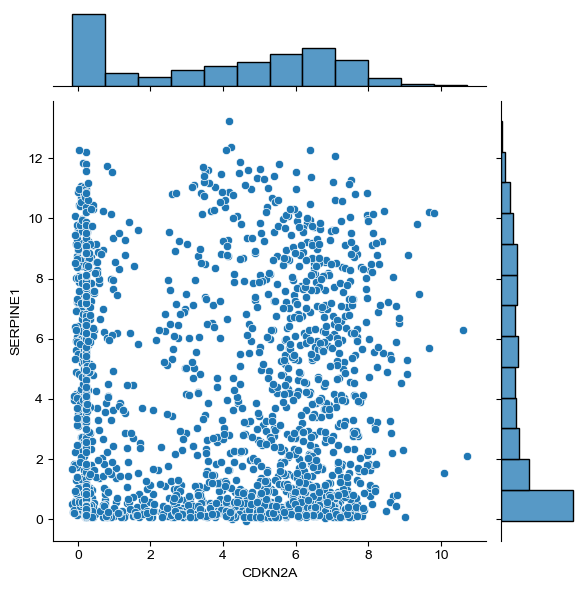

In [49]:
# jointplot allows you to see histograms and a scatter in one line of code
sns.jointplot(joint_df, x= "CDKN2A", y="SERPINE1")

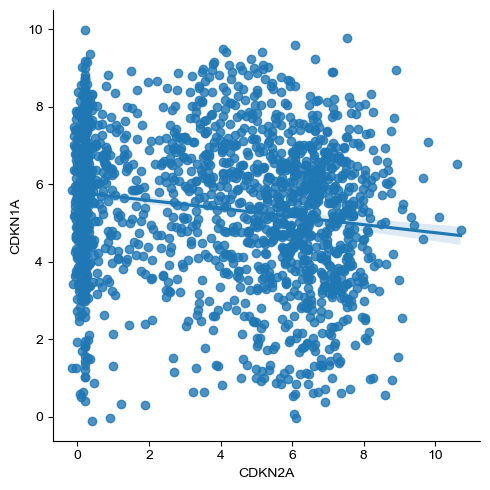

In [50]:
# include a linear fit
sns.lmplot(joint_df, x = "CDKN2A", y="CDKN1A")
# how to export as pdf
plt.savefig("lmplot.pdf") # this needs to be in the same cell as the code for the plot

# Plotly

Install plotly on command line 
$ conda install plotly::plotly_express

In [51]:
import plotly_express as px

In [52]:
# can hover over points in the plot and see more info 
# it's interactive, can double click on points to only see that type
fig = px.scatter(pca_df, x="comp_0", y="comp_1", color="OncotreeLineage")
fig.write_html("depmap_pca.html")

In [53]:
fig